# Dimensionality Reduction

In real-word problems, it is often possible to reduce the number of reatures considerably, turning an intractable problem into a tractable one.  For example, consider the MNIST images: the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information.  Additionally, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information.

<b>Reducing dimensionality does cause some information loss.  In some cases, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance, but in general it won't; it will just speed up training.</b>

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization.  Data visualization is essential to communicate your conclusions to people who are not data scientists- in particular, decision makers who will use your results.

This textbook will cover two main approaches to dimensionality reduction (project and Manifold Learning) and three of the most popular dimensionality reduction techniques (PCA, Kernel PCA, and LLE).

## The Curse of Dimensionality

High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far way from each other.  This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations.  <b>In short, the more dimensions the trianing set has, the greater the risk of overfitting it.</b>

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.  Unfortunately, in practice, just 100 features would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average.

## Main Approaches for Dimensionality Reduction

### Projection

In most real-world problems, training instances are <i> not </i> spread out uniformly across all dimensions.  Many features are almost constant, while others are highly correlated.  As a result, all training instances lie within a much lower-dimensional <i>subspace</i> of the high dimensional space.

Projection essentially maps the training data onto a lower-dimensional space.

Projection is not always the best approach to dimensionality reduction, such as in the famouse Swiss roll toy dataset.  Simply projecting onto a plane would squash different layers of the Swiss roll together.  What you really want is to unroll the Swiss roll. 

### Manifold Learning

The Swiss roll is an example of a 2D <i> manifold </i>. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher dimensional space.  More generally, a d-dimensional manifold is part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called <i> Manifold Learning </i>.  It relies on the <i> manifold assumption </i>, also called the <i> manifold hypothesis </i>, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.  This assumption is very often empiriaclly observed.

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.

However, this implicit assumption does not always hold.  In short, reducing the dimensionality of your training set before training a model will usuall speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

## PCA

<i> Principal Component Analysis </i> (PCA) is by far the most popular dimensionality reduction algorithm.  First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

### Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane.

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.  Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis.  This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set.  It also finds the second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.  If it were a higher dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fouth, a fifth, and so on- as many axes as the number of dimensions in the dataset.

So how can you find the principal components of a training set?  There is a standard matrix factorization technique called <i>Singular Value Decomposition (SVD) </i> that can decompose the training set matrix <b>X</b> into the matrix multiplication of three matrices <b>$U\Sigma V^{T}$</b> where <b>V</b> contains the unit vectors that define all the principal components that we are looking for.

#### Example 1: Numpy Singular Value Decomponsition (SVD)

In [4]:
import numpy as np

"""
PCA assumes that the dataset is centered around the origin.  As we will see, Scikit-Learn's PCA classes take care of centering the data for you.  
If you implement PCA yourself, or if you use other libraries, don't forget to center the data first
"""

X = np.random.rand(100, 5)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1, c2 = Vt.T[:, 0], Vt.T[:, 1]

c1, c2

(array([-0.01462817, -0.93403821,  0.3181    , -0.01794683,  0.16077608]),
 array([ 0.10038831, -0.03715822,  0.18544964,  0.85152085, -0.47860435]))

### Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to <i> d </i> dimensions by projecting it onto the hyperplane defined by the first <i> d </i> principal components.  Selecting this hyperplane ensures that hte projection will preserve as much variance as possible.

To project the training set onto the hyperplane and obtain a reduced dataset <b>$X_{d-proj}$</b> of dimensionality <i> d </i>, compute the matrix multiplication of the training set matrix <b> X </b> by the matrix <b> $W_{d}$, </b> defined as the matrix containing the first <i> d </i> columns of <b> V </b>.

$X_{d-proj} = XW_{d}$

#### Example 2: Projecting onto a plane with numpy

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

X_centered.shape, X2D.shape

((100, 5), (100, 2))

### Using Scikit-Learn

Scikit-Learn's PCA class uses SVD decomposition to implement PCA, just like we did earlier.  The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions.  

After fitting the PCA transformer to the dataset, its components_ attribute holds the transpose of $W_{d}$ (e.g., the unit vector that defines the first principal component is equal to pca.components_.T[:, 0])

#### Example 3: Projecting onto a plane with Scikit-Learn

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print(X.shape, X2D.shape)
pca.components_.T[:, 0], pca.explained_variance_ratio_

(100, 5) (100, 2)


(array([ 0.01462817,  0.93403821, -0.3181    ,  0.01794683, -0.16077608]),
 array([0.25022834, 0.22155099]))

### Explained Variance Ratio

Another useful piece of information is the <i> explained variance ratio </i> of each principal component, available via the <b> explained_variance_ratio_ variable. </b>  The ratio indicates the proportion of the dataset's variance that lies along each principal component.

### Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).  Unless, of course, you are reducing dimensionality for data visualization- in that case you will want to reduce the dimensionality down to 2 or 3.

When working with Scikit-Learn's PCA classes, instead of specifying the number of principal components you want to preserve, you cna set n_components to be a float between 0 and 1, indicating the ratio of variance you wish to preserve.  

Another option is to plot the explained variance as a function of the number of dimensions (simply plot np.cumsum()).  There will usually be an elbow in the curve where the explained variance stops growing fast.  This is roughly the optimal amount of dimensions to preserve.

#### Example 4: Reducing dimensionality but preserving 95% variance

In [17]:
X_train = np.random.rand(200, 20)

# Method 1
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# Method 2
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape, d

((200, 19), 19)

### PCA for Compression

After dimensionality reduction, the training set takes up much less space.  As an example, try applying PCA to the MNIST datset while preserving 95% of its variance.  You should find that each instance will have just over 150 features, instead of the original 784 features.  So, while most of the variance is preserved, the dataset is now less than 20% of its original size!

It is also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection.  This won't give you back the original data, since the projection lost a bit of information, but it will likely be close to the original data.  The mean squared distance between the original data and the reconstructed data (compressed then decompressed) is called the <i> reconstruction error </i>.

#### Example 5: Reconstruction

<Figure size 640x480 with 0 Axes>

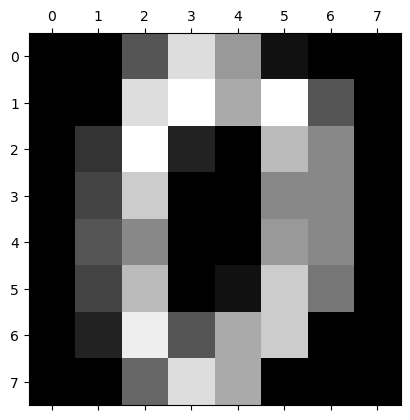

In [27]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits().data

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(digits)
X_recovered = pca.inverse_transform(X_reduced)

plt.gray()
plt.matshow(load_digits().images[0])

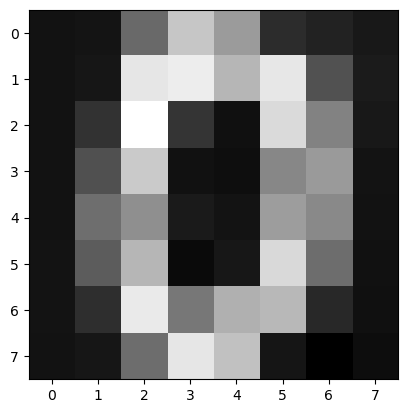

In [28]:
pixels = X_recovered[0].reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

### Randomized PCA

If you set the svd_solver hyperparameter to 'randomized', Scikit-Learn uses a stochastic algorithm called <i> Randomized PCA </i> that quickly finds an approximation of the first <i> d </i> principal components.  It is dramatically faster than full SVD when <i> d </i> is much smaller than <i> n </i>.  

Scikit-Learn automatically uses the randomized PCA algorithm if <i> m </i> or <i> n </i> is greater than 500 and <i> d </i> is less than 80% of <i> m </i> or <i> n</i> .

#### Example 6: Using Randomized PCA with Scikit-Learn

In [32]:
digits = load_digits().data
rnd_pca = PCA(n_components=64, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(digits)

### Incremental PCA

One problem with the preceding implementation of PCA is that they require the whole training set to fit in memory in order for the algorithm to run.  Fortunately, <i> Incremental PCA </i> (IPCA) algorithms have been developed. They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.  This is useful for large training sets and for applying PCA online.

Scikit-Learn's <b> IncrementalPCA </b> class can be fed sequential batches of data by calling the partial_fit() method with each mini-batch, rather than the fit() method with the whole training set.

Alternatively, you can use NumPy's <b> memmap </b> class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it.  Since IncrementalPCA class uses only a small part of hte array at any given time, the memory usage remains under control.  The makes it possible to call the usual fit() method.

#### Example 7: Incremental PCA

In [39]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

# Method 1
n_batches = 100
inc_pca = IncrementalPCA(n_components=17)
for X_batch in np.array_split(digits, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(digits)

# Method 2
# X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components+154, batch_size=batch_size)
# inc_pca.fit(X_mm)

### Kernel PCA

Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the <i> original space. </i>

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction.  This is called <i> Kernel PCA </i> (kPCA).

#### Example 8: Kernel PCA

In [41]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
X_reduced.shape

(100, 2)

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.  That said, dimensionality reduction is often a preparation step for supervised learning task (e.g, classification), so you can use grid search to select the kernel and hyperparameters that lead to the best performance on that task.

Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error.  Note that reconstruction is not as easy as with linaer PCA.

#### Example 9: Selecting a Kernel and Tuning Hyperparameters

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Method 1: Grid Search
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

dataset = load_digits()
X, y = dataset.data, dataset.target
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

# Method 2: Reconstruction
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
print(mean_squared_error(X, X_preimage)) # Now use this as the criteria to minimize

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}
18.743988905546928


### LLE

<i> Locally Linear Embedding </i> (LLE) is another powerful <i> nonlinear dimensionality reduction </i> (NLDR) technique.  It is a Manifold Learning technique that does not rely on projections, like the previous algorithms do.  In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. This approach makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

Here's how LLE works: for each training instance $x^{i}$, the algorithm identifies its <i> k </i> closest neighbors, then tries to reconstruct $x^{i}$ as a linaer function of these neighbors.  After this step, the weight matrix <b> W </b> encodes that local linear relationships between the training instances.  The second step is to map the training instances into a <i> d- </i>dimensional space (where d < n) while preserving these local relationships as much as possible. 

Scikit-Learn's LLE implementation has the following computational complexity: 

<b> O(<i>m</i>log(<i>m</i>)<i>n</i>log(<i>k</i>)) </b> for finding the <i> k </i> nearest neighbors, <b> O(<i>mn$k^{3}$</i>) </b> for optimizing the weights, and <b> O(<i>d$m^{2}$</i>) </b> for constructing the low-dimensional representations.

Unfortunately, the <i>$m^{2}$</i> in the last term makes this algorithm scale poorly to very large datasets.

In [52]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced.shape

(1797, 2)

### Other Dimensionality Reduction Techniques

1. Random Projections
    - As the name suggests, projects the data to a lower-dimensional space using a random linear projection.  This may sound crazy, but it turns out that such a random projection is actually very likley to preserve distances well.
    - Check out the documentation for the sklearn.random_projection pacakge for more details
<br><br>
1. Miltidimensional Scaling (MDS)
    - Reduces dimensionality while trying to preserve the distances between the instances.
<br><br>
1. Isomap
    - Creats a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preseve the geodesic distances (shortest path) between the instances.
<br><br>
1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
    - Reduces dimensionality while trying to keep similar instances close and dissimliar instance apart.  It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space
<br><br>
1. Linear Discriminant Analysis (LDA)
    - Is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data.  The benfit of this approach is that the projection will keep classses as far apart as possible, <b> so LDA is a good technique to reduce dimensionality before running another classification algorithm, such as an SVM </b>.

# Exercises

<b> 1. What are the main motivations for reducing the dataset's dimensionality?  What are the main drawbacks?

My answer

- The main movitivations discussed in the chapter are:
    1. Better for visualizations
    1. Better for training speeds
    1. Better for filesize and storage
    1. Occasionally better model performance (but not often)
<br><br>
- The main drawbacks:
    1. Information loss means worse model performance most of the time
    1. Information loss means decompressed datasets will permanently lose some information.

Book Answer:

- The main movitivations discussed in the chapter are:
    1. To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)
    1. To visualize data and gain insights on the most important features.
    1. To save space
<br><br>
- The main drawbacks:
    1. Some information is lost, possiby degrading the performance of subsequent training algorithms
    1. It can be computationally expensive
    1. It adds some complexity to your Machine Learning Pipelines
    1. Transformed features are often hard to interpret.

<b> 2. What is the curse of dimensionality?

My answer:

In short, the more dimensions a dataset has, the more likely a model is to overfit that data.

Book Answer:

The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space.  In Machine Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data.

<b> 3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how?  If not, why?

My answer:

Yes, Scikit-Learn's PCA classes have a reverse_transform() method.  The linear algebra behind these reverse transformations is fairly complex but as long as the foundational rules of linear algebra hold then any dimensionality reduction algorithm can be inversed with some information loss. 

Book Answer:

Once a dataset's dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction.  Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that scan reconstruct a dataset relavtively simliar to the original, other algorithms (such as T-SNE) do not.

<b> 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

My answer:

For highly nonlinear data Manifold Learning techniques are probably better suited than PCA.  But PCA <b> can </b> be used. Kernel PCA is good for projecting nonlinear datasets. It just may not be the optimal solution.

Book Answer:

PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions.  However, if there are no useless dimensions- as in a Swiss roll dataset- then reducing dimensionality with PCA will lose too much information.  You want to unroll the Swiss roll, not squash it.

<b> 5. Suppose you perform PCA on a 1,000 dimensional dataset, setting the explained variance ratio to 95%.  How many dimensions will the resulting dataset have?

My answer:

It will have as many dimensions as necessary to explain 95% of the dataset variance. The exact number will depend on the correlation matrix for all features.  If every feature is entirely independent then the resulting dataset will have 1000 or near 1000 dimensions.  If every feature is perfectly correlated then the resulting dataset will have 1 dimension. 

Book Answer:

That's a trick question: it depends on the dataset.  Let's look at two extreme examples.  First, suppose the dataset is composed of points that are almost perfectly aligned.  In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance.  Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions.  In this case roughly 950 dimensions are required to preserve 95% of the variance.  So the answer is, it depends on the dataset, and it could be any number between 1 and 950.  <b> Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of hte dataset's intrinsic dimensionality. </b>

<b> 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA or Kernel PCA?

My answer:

- PCA: When the dataset fits into memory, is not too complex and linear, and the target dimensions are unknown or greater than 80% of the total features or instances (500 or greater for m or n)
- Incremental PCA: The dataset is very large and doesn't fit into memory.
- Randomized PCA: When the target amount of dimensions is 80% or less than the total features or total instances and either total features or total instances is 500 or greater.
- Kernel PCA: The dataset is complex and nonlinear.

Book Answer:

- PCA: The default, but only works if the dataset fits in memory.
- Incremental PCA: Useful for large datasets that don't fit in memory and online tasks if the data is fed continuously.  It is slower than PCA though.
- Randomized PCA: Useful when you want to considerably reduce dimensionality and the dataset fits in memory.
- Kernel PCA: The dataset is complex and nonlinear.

<b> 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

My answer:

You can measure the time-save when training the model as well as comparing the prediction accuracy.  

Book Answer:

Intuitively, a dimensinality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information.  One way to measure this is to apply the reverse transformation and measure the reconstruction error.  However, not all dimensionality reduction algorithms provide a reverse transformation.  Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm, then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.

<b> 8. Does it make any sense to chain two different dimensionality reduction algorithms?

My answer:

Yes, it can make sense to chain two different dimensionality reduction algorithms. For instance, one can use PCA to quickly get rid of a large number of useless dimensions, then apply another much slower dimensionality reduction algorithm, such as LLE. However, it is important to note that the effectiveness of chaining dimensionality reduction algorithms depends on the specific use case and the algorithms being used  

Book Answer:

It can absolutely make sense to chain two different dimensionality reduction algorithms.  A common example is using PCA to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE.  This two-step approach will likely yield the same performance as using LLE only, but in a fraction of the time.  


9. <b> Load the MNIST dataset and split it into a training set and a test set (60,000, 10,000).</b>
    1. Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
    1. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.
    1. Train a new Random Forest classifier on the reduced dataset and see how long it takes.  Was training much faster?
    1. Evaluate the classifier on the test set.  How does it compare to the previous classifier?

In [93]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from timeit import default_timer

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(60000, 784)
test_X = test_X.reshape(10000, 784)

rf_clf = RandomForestClassifier(n_estimators=50, min_samples_split=5)

start = default_timer()
rf_clf.fit(train_X, train_y)
preds = rf_clf.predict(test_X)
print(accuracy_score(test_y, preds), f'{round(default_timer() - start, 2)} seconds')

0.9655 24.44 seconds


In [94]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(60000, 784)
test_X = test_X.reshape(10000, 784)

clf = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('rf_clf', RandomForestClassifier(n_estimators=50, min_samples_split=5))
])

start = default_timer()
clf.fit(train_X, train_y)
preds = clf.predict(test_X)
print(accuracy_score(test_y, preds), f'{round(default_timer() - start, 2)} seconds')

0.9451 74.18 seconds


In [92]:
train_X.shape, PCA(n_components=0.95).fit_transform(train_X).shape

((60000, 784), (60000, 154))

I'm not too sure what to make of this.  PCA not only took 3x longer but also had worse accuracy.  You would think with significantly fewer features the train speed would be faster.

According to this response: https://stackoverflow.com/questions/51576272/why-does-performance-suffer-when-fitting-a-random-forest-model-after-reducing-wi

> So, while fitting, the algorithm is iterating over possible splits that optimize the criterion. However, by reducing the number of features you might have made the problem to find this splits more difficult (by having less good splits to find), which makes the algorithm need more iterations to find a good split.

10. <b>Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib.</b>
    - You can use a scatterplot using 10 different colors to represent each image's target class.
    - Alternatively, you can replace each dot in the scatterplot with the corresponding instance's class or even plot scaled down versions of the digit images themselves.
    - You should get a nice visualization with well-separated clusters of digits.
    - Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [109]:
# This cell takes a very long time
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# For the sake of time lets transform and plot the test set

tsne_mnist2d = TSNE(n_components=2, n_jobs=-1).fit_transform(test_X)
pca_mnist2d = PCA(n_components=2).fit_transform(test_X)
lle_mnist2d = LocallyLinearEmbedding(n_components=2, n_jobs=-1).fit_transform(test_X)
mds_mnist2d = MDS(n_components=2, normalized_stress='auto', n_jobs=-1).fit_transform(train_X[0:500])

In [118]:
tsne_mnist2d.shape

(10000, 2)

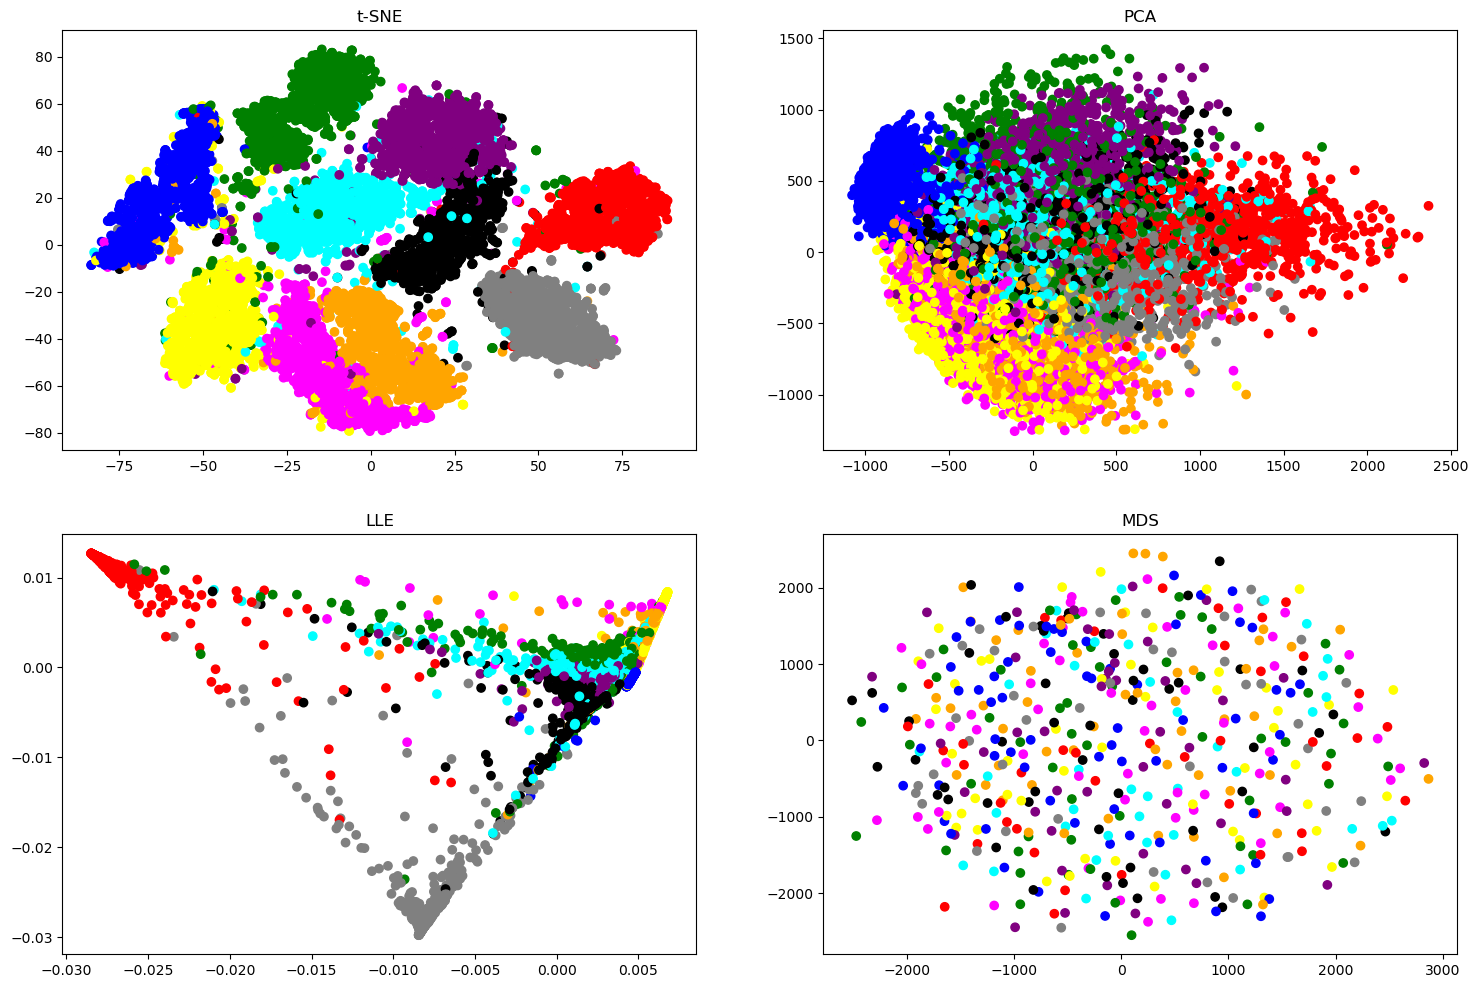

In [123]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

topleft = ax[0][0]
topright = ax[0][1]
bottomleft = ax[1][0]
bottomright = ax[1][1]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'gray', 'yellow', 'aqua', 'magenta']

topleft.scatter(tsne_mnist2d.T[0], tsne_mnist2d.T[1], c=test_y, cmap=matplotlib.colors.ListedColormap(colors))
topright.scatter(pca_mnist2d.T[0], pca_mnist2d.T[1], c=test_y, cmap=matplotlib.colors.ListedColormap(colors))
bottomleft.scatter(lle_mnist2d.T[0], lle_mnist2d.T[1], c=test_y, cmap=matplotlib.colors.ListedColormap(colors))
bottomright.scatter(mds_mnist2d.T[0], mds_mnist2d.T[1], c=test_y[0:500], cmap=matplotlib.colors.ListedColormap(colors))

topleft.set_title('t-SNE')
topright.set_title('PCA')
bottomleft.set_title('LLE')
bottomright.set_title('MDS')
plt.show()